In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==1:
        train = pd.read_pickle('salida/nuevo/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_M,list_m,list_T,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.108,0.000,0.000000e+00,0.000000,0.000000,2,0.000000,2,0,9,0.592593,YES
1,0.000000,0.000000,1.883,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,2,0,8,0.633041,YES
2,0.000000,0.000000,0.986,0.000,0.000000e+00,0.000000,0.000000,1,0.000000,1,0,9,0.562500,UNKNOWN
3,1.377961,1.470112,1.681,2.059,4.712027e+00,0.000000,1.000000,1,0.111111,2,1,9,0.583333,NO
4,0.690211,1.408800,2.280,1.664,3.227913e+00,0.012594,0.356492,2,0.142857,3,1,7,0.587719,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000000,0.000000,1.696,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,3,0,7,0.604167,UNKNOWN
696,0.000000,0.000000,1.252,0.000,0.000000e+00,0.000000,0.000000,5,0.000000,4,0,10,0.630435,YES
697,0.000000,1.000021,1.233,0.000,1.521449e-12,0.000000,0.000000,1,0.111111,2,1,9,0.552632,UNKNOWN
698,0.000000,0.000000,1.921,0.000,0.000000e+00,0.000000,0.000000,2,0.000000,2,0,7,0.575758,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

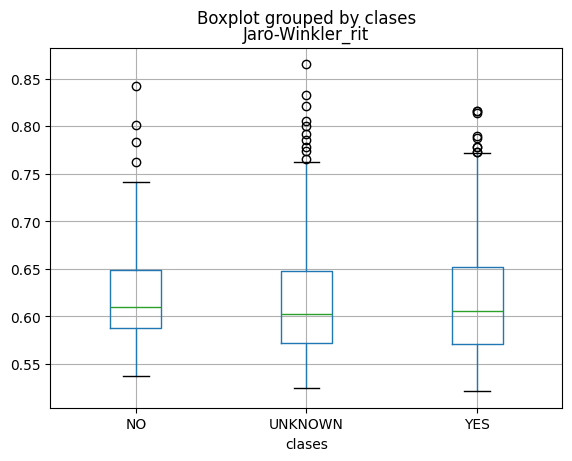

In [4]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.108,0.000,0.000000e+00,0.000000,0.000000,2,0.592593,YES
1,0.000000,0.000000,1.883,0.000,0.000000e+00,0.000000,0.000000,4,0.633041,YES
2,0.000000,0.000000,0.986,0.000,0.000000e+00,0.000000,0.000000,1,0.562500,UNKNOWN
3,1.377961,1.470112,1.681,2.059,4.712027e+00,0.000000,1.000000,1,0.583333,NO
4,0.690211,1.408800,2.280,1.664,3.227913e+00,0.012594,0.356492,2,0.587719,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
695,0.000000,0.000000,1.696,0.000,0.000000e+00,0.000000,0.000000,4,0.604167,UNKNOWN
696,0.000000,0.000000,1.252,0.000,0.000000e+00,0.000000,0.000000,5,0.630435,YES
697,0.000000,1.000021,1.233,0.000,1.521449e-12,0.000000,0.000000,1,0.552632,UNKNOWN
698,0.000000,0.000000,1.921,0.000,0.000000e+00,0.000000,0.000000,2,0.575758,NO


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'Jaro-Winkler_rit', 'clases'],
      dtype='object')

In [7]:
#train=train.drop(["list_rel_con"],axis=1)

In [8]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.108,0.000,0.000000e+00,0.000000,0.000000,2,0.592593,YES
1,0.000000,0.000000,1.883,0.000,0.000000e+00,0.000000,0.000000,4,0.633041,YES
2,0.000000,0.000000,0.986,0.000,0.000000e+00,0.000000,0.000000,1,0.562500,UNKNOWN
3,1.377961,1.470112,1.681,2.059,4.712027e+00,0.000000,1.000000,1,0.583333,NO
4,0.690211,1.408800,2.280,1.664,3.227913e+00,0.012594,0.356492,2,0.587719,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...
695,0.000000,0.000000,1.696,0.000,0.000000e+00,0.000000,0.000000,4,0.604167,UNKNOWN
696,0.000000,0.000000,1.252,0.000,0.000000e+00,0.000000,0.000000,5,0.630435,YES
697,0.000000,1.000021,1.233,0.000,1.521449e-12,0.000000,0.000000,1,0.552632,UNKNOWN
698,0.000000,0.000000,1.921,0.000,0.000000e+00,0.000000,0.000000,2,0.575758,NO


In [9]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [10]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [11]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit
sumas,1.000000,0.325706,0.357742,0.776571,0.682893,0.003810,0.855764,-0.268202,-0.146847
distancias,0.325706,1.000000,0.026310,0.644217,0.619432,0.346300,0.332196,-0.449534,0.124377
entropia_total,0.357742,0.026310,1.000000,0.343204,0.186040,-0.191251,0.268335,0.184787,0.057862
entropias,0.776571,0.644217,0.343204,1.000000,0.905831,0.226616,0.734228,-0.434430,-0.003598
mutinf,0.682893,0.619432,0.186040,0.905831,1.000000,0.231997,0.738345,-0.444817,0.007025
mearts,0.003810,0.346300,-0.191251,0.226616,0.231997,1.000000,-0.082533,-0.255565,-0.039605
max_info,0.855764,0.332196,0.268335,0.734228,0.738345,-0.082533,1.000000,-0.266117,-0.052530
list_comp,-0.268202,-0.449534,0.184787,-0.434430,-0.444817,-0.255565,-0.266117,1.000000,0.272718
Jaro-Winkler_rit,-0.146847,0.124377,0.057862,-0.003598,0.007025,-0.039605,-0.052530,0.272718,1.000000


<Axes: >

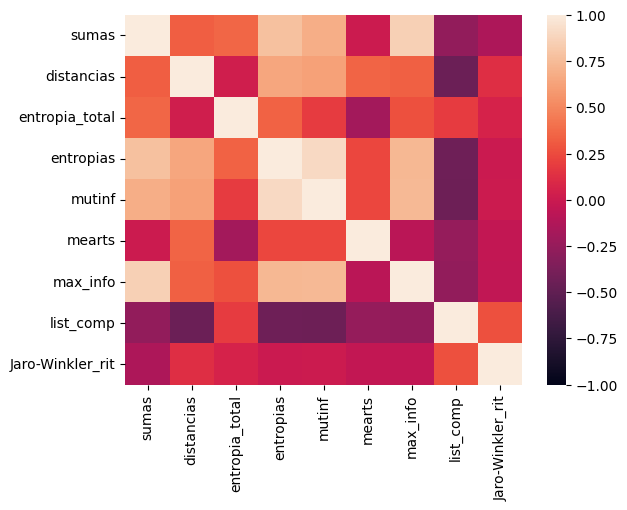

In [12]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit
sumas,1.000000,0.325706,0.357742,0.776571,0.682893,0.003810,0.855764,-0.268202,-0.146847
distancias,0.325706,1.000000,0.026310,0.644217,0.619432,0.346300,0.332196,-0.449534,0.124377
entropia_total,0.357742,0.026310,1.000000,0.343204,0.186040,-0.191251,0.268335,0.184787,0.057862
entropias,0.776571,0.644217,0.343204,1.000000,0.905831,0.226616,0.734228,-0.434430,-0.003598
mutinf,0.682893,0.619432,0.186040,0.905831,1.000000,0.231997,0.738345,-0.444817,0.007025
mearts,0.003810,0.346300,-0.191251,0.226616,0.231997,1.000000,-0.082533,-0.255565,-0.039605
max_info,0.855764,0.332196,0.268335,0.734228,0.738345,-0.082533,1.000000,-0.266117,-0.052530
list_comp,-0.268202,-0.449534,0.184787,-0.434430,-0.444817,-0.255565,-0.266117,1.000000,0.272718
Jaro-Winkler_rit,-0.146847,0.124377,0.057862,-0.003598,0.007025,-0.039605,-0.052530,0.272718,1.000000


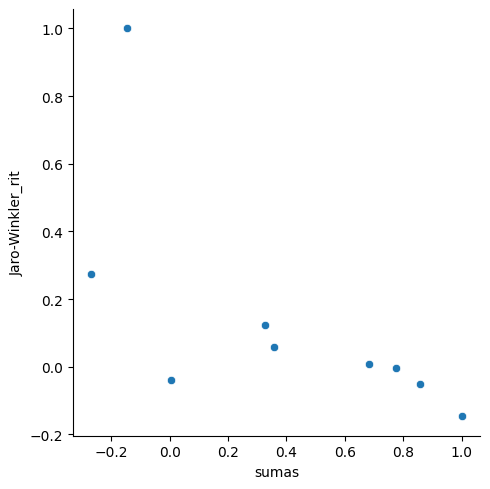

In [14]:
# Checar variables colineales
sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [15]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [16]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

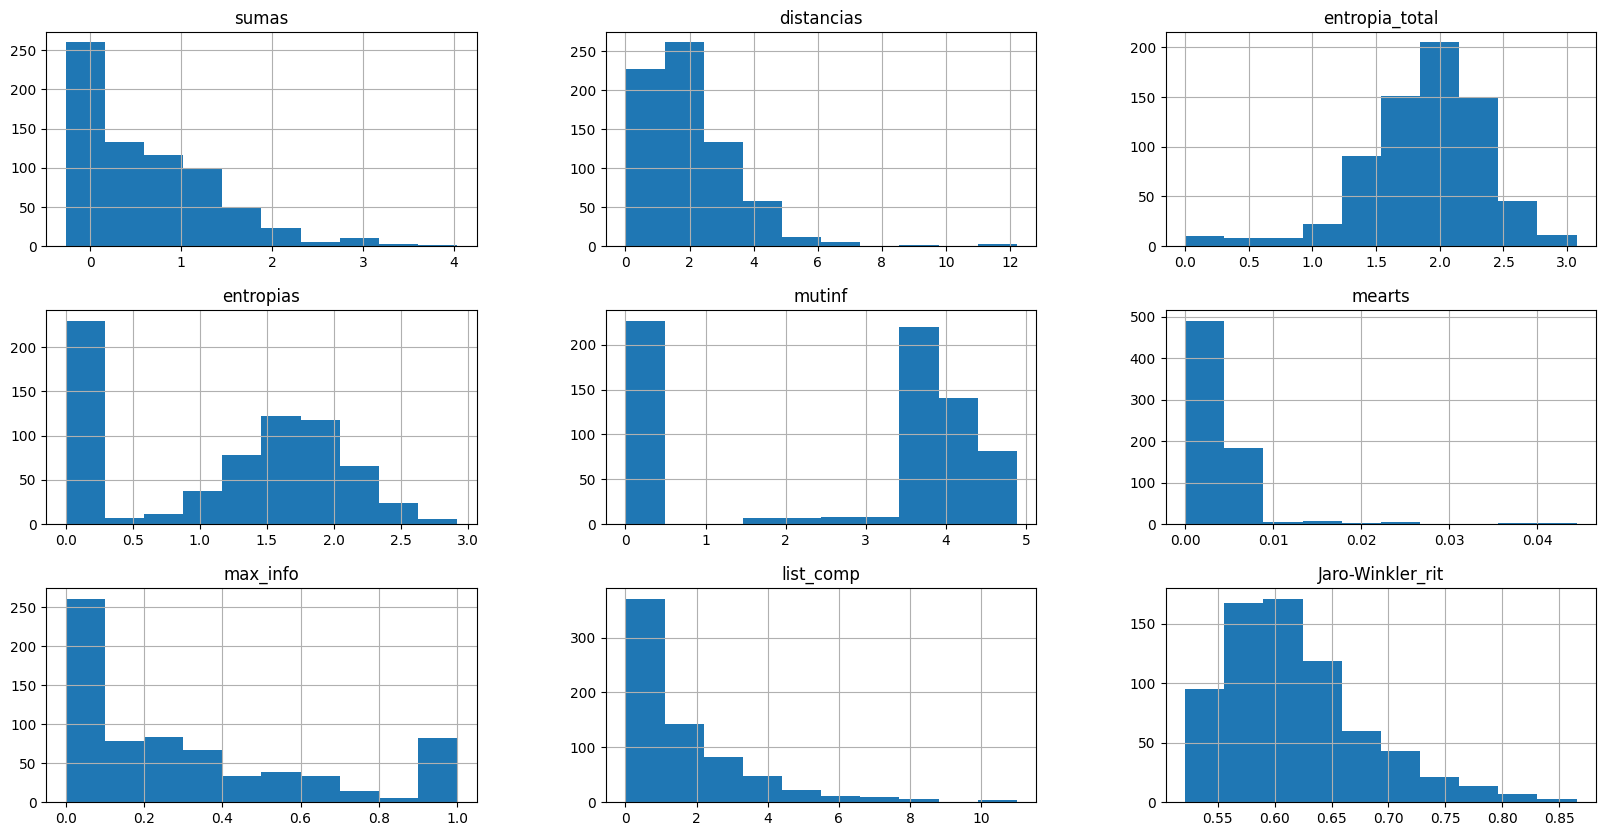

In [17]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [18]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [19]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_M,list_m,list_T,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.578,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,2,0,8,0.569444,YES
1,0.000000,0.000000,1.967,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,2,0,8,0.569444,YES
2,0.000000,1.000030,0.000,0.000,1.521449e-12,0.000000,0.000000,0,0.250000,1,1,4,0.595238,YES
3,0.810502,2.433198,1.899,1.502,2.371714e+00,0.022098,0.500000,1,0.250000,3,2,8,0.600000,YES
4,0.000000,1.000053,1.291,0.000,8.171241e-13,0.044196,0.000000,2,0.125000,3,1,8,0.566667,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.868840,1.388172,2.122,1.371,3.830299e+00,0.004352,0.585769,2,0.200000,2,1,5,0.598039,YES
796,2.076455,1.422516,2.128,2.128,4.677952e+00,0.000000,1.000000,0,0.142857,1,1,7,0.580000,NO
797,0.000000,0.000000,2.051,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,3,0,12,0.541667,UNKNOWN
798,0.009824,1.461557,1.959,1.252,3.801192e+00,0.003925,0.121048,2,0.166667,2,1,6,0.633333,UNKNOWN


In [20]:
test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)


In [21]:
#test=test.drop(["list_rel_con"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.578,0.000,0.000000e+00,0.000000,0.000000,3,0.569444,YES
1,0.000000,0.000000,1.967,0.000,0.000000e+00,0.000000,0.000000,4,0.569444,YES
2,0.000000,1.000030,0.000,0.000,1.521449e-12,0.000000,0.000000,0,0.595238,YES
3,0.810502,2.433198,1.899,1.502,2.371714e+00,0.022098,0.500000,1,0.600000,YES
4,0.000000,1.000053,1.291,0.000,8.171241e-13,0.044196,0.000000,2,0.566667,NO
...,...,...,...,...,...,...,...,...,...,...
795,0.868840,1.388172,2.122,1.371,3.830299e+00,0.004352,0.585769,2,0.598039,YES
796,2.076455,1.422516,2.128,2.128,4.677952e+00,0.000000,1.000000,0,0.580000,NO
797,0.000000,0.000000,2.051,0.000,0.000000e+00,0.000000,0.000000,3,0.541667,UNKNOWN
798,0.009824,1.461557,1.959,1.252,3.801192e+00,0.003925,0.121048,2,0.633333,UNKNOWN


In [22]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases
0,0.000000,0.000000,2.578,0.000,0.000000e+00,0.000000,0.000000,3,0.569444,YES
1,0.000000,0.000000,1.967,0.000,0.000000e+00,0.000000,0.000000,4,0.569444,YES
2,0.000000,1.000030,0.000,0.000,1.521449e-12,0.000000,0.000000,0,0.595238,YES
3,0.810502,2.433198,1.899,1.502,2.371714e+00,0.022098,0.500000,1,0.600000,YES
4,0.000000,1.000053,1.291,0.000,8.171241e-13,0.044196,0.000000,2,0.566667,NO
...,...,...,...,...,...,...,...,...,...,...
795,0.868840,1.388172,2.122,1.371,3.830299e+00,0.004352,0.585769,2,0.598039,YES
796,2.076455,1.422516,2.128,2.128,4.677952e+00,0.000000,1.000000,0,0.580000,NO
797,0.000000,0.000000,2.051,0.000,0.000000e+00,0.000000,0.000000,3,0.541667,UNKNOWN
798,0.009824,1.461557,1.959,1.252,3.801192e+00,0.003925,0.121048,2,0.633333,UNKNOWN


In [23]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [24]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [25]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [26]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.68575146, ..., 0.        , 0.18181818,
        0.6848249 ],
       [0.        , 0.        , 0.61255693, ..., 0.        , 0.36363636,
        0.73156871],
       [0.        , 0.        , 0.32075472, ..., 0.        , 0.09090909,
        0.65004864],
       ...,
       [0.        , 0.08190181, 0.40110605, ..., 0.        , 0.09090909,
        0.63864428],
       [0.        , 0.        , 0.62491867, ..., 0.        , 0.18181818,
        0.66536965],
       [0.30097251, 0.11831831, 0.52407287, ..., 0.99999976, 0.09090909,
        0.73511673]])

In [27]:
X_train.shape

(700, 9)

In [28]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [29]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
model.decision_function(X_train)

array([ 6.52164218e-01,  9.34698671e-01,  3.13308455e-01,  2.57443192e-01,
       -7.78335918e-02,  3.15678636e-01,  8.88797813e-01,  6.69221811e-01,
        1.56525011e+00,  3.54861918e-01,  1.09685615e+00,  3.24506887e-02,
        3.64982984e-01,  5.92481374e-03, -5.67913932e-01,  4.73784462e-01,
        8.12494306e-01,  8.40781364e-01,  1.10374562e-01, -4.58882023e-01,
       -4.58882023e-01,  3.71251642e-01,  7.07941390e-01,  7.87548414e-01,
        4.94899268e-01,  5.74899924e-01,  8.99551401e-01, -3.76087551e-01,
       -8.66768296e-01, -4.27115363e-01,  8.51588309e-01, -8.48355238e-02,
        8.91227187e-01,  6.98960037e-01,  6.52256963e-01,  2.55190483e-01,
        5.58826125e-01, -6.16260762e-01,  6.43474718e-01, -1.18991550e-01,
       -7.84736845e-01,  4.52519155e-03, -5.13802855e-01,  7.15676175e-01,
        4.20958125e-01,  2.37114367e-01,  5.25111533e-01,  7.11290591e-01,
        6.62866845e-01, -8.29670457e-01, -4.28362376e-01, -1.62381457e-01,
        9.28508070e-02,  

In [31]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'Jaro-Winkler_rit'],
      dtype='object')

In [32]:
model.classes_

array([0, 1])

In [33]:
model.coef_[0]

array([ 1.03159547, -1.72906119,  0.50544256, -0.8920178 , -0.49647852,
       -0.66445519,  0.80522472,  1.87901738, -0.47299182])

In [34]:
coeficientes=model.coef_[0]

In [35]:
coeficientes

array([ 1.03159547, -1.72906119,  0.50544256, -0.8920178 , -0.49647852,
       -0.66445519,  0.80522472,  1.87901738, -0.47299182])

In [36]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  7 list_comp 1 distancias


In [37]:
n_columns=train.shape[1]-1

In [38]:
n_columns

9

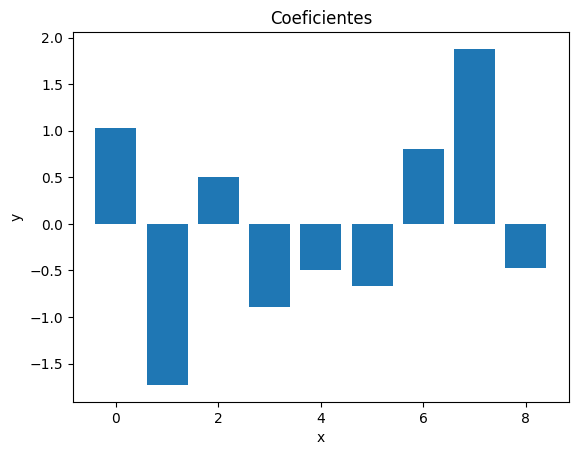

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [40]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.80840389, ..., 0.        , 0.3       ,
        0.62121212],
       [0.        , 0.        , 0.61680778, ..., 0.        , 0.4       ,
        0.62121212],
       [0.        , 0.17132675, 0.        , ..., 0.        , 0.        ,
        0.64935065],
       ...,
       [0.        , 0.        , 0.64314832, ..., 0.        , 0.3       ,
        0.59090909],
       [0.00259856, 0.25039639, 0.61429915, ..., 0.12104767, 0.2       ,
        0.69090909],
       [0.        , 0.        , 0.80244591, ..., 0.        , 0.6       ,
        0.83264463]])

In [41]:
X_test.shape

(800, 9)

In [42]:
predictions = model.predict(X_test)

In [43]:
predictions

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [44]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases,predicciones
0,0.000000,0.000000,2.578,0.000,0.000000e+00,0.000000,0.000000,3,0.569444,YES,1
1,0.000000,0.000000,1.967,0.000,0.000000e+00,0.000000,0.000000,4,0.569444,YES,1
2,0.000000,1.000030,0.000,0.000,1.521449e-12,0.000000,0.000000,0,0.595238,YES,0
3,0.810502,2.433198,1.899,1.502,2.371714e+00,0.022098,0.500000,1,0.600000,YES,0
4,0.000000,1.000053,1.291,0.000,8.171241e-13,0.044196,0.000000,2,0.566667,NO,0
...,...,...,...,...,...,...,...,...,...,...,...
795,0.868840,1.388172,2.122,1.371,3.830299e+00,0.004352,0.585769,2,0.598039,YES,1
796,2.076455,1.422516,2.128,2.128,4.677952e+00,0.000000,1.000000,0,0.580000,NO,1
797,0.000000,0.000000,2.051,0.000,0.000000e+00,0.000000,0.000000,3,0.541667,UNKNOWN,1
798,0.009824,1.461557,1.959,1.252,3.801192e+00,0.003925,0.121048,2,0.633333,UNKNOWN,0


In [45]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,Jaro-Winkler_rit,clases,predicciones
2,0.000000,1.000030,0.000,0.000,1.521449e-12,0.000000,0.000000,0,0.595238,YES,0
3,0.810502,2.433198,1.899,1.502,2.371714e+00,0.022098,0.500000,1,0.600000,YES,0
10,0.235192,1.403387,0.954,1.000,3.899859e+00,0.005917,0.116002,1,0.722222,YES,0
18,0.517864,2.469339,2.553,1.730,2.298480e+00,0.021631,0.500000,3,0.633041,YES,0
22,0.785571,1.409585,1.247,1.392,3.935872e+00,0.006901,0.344185,2,0.605159,YES,0
...,...,...,...,...,...,...,...,...,...,...,...
755,0.688784,2.766403,2.174,1.571,3.699710e+00,0.003756,0.318698,1,0.662037,YES,0
757,0.809237,1.383830,1.371,1.371,3.743224e+00,0.005631,0.223623,0,0.753968,YES,0
770,1.381129,2.899146,2.078,1.979,4.354221e+00,0.002262,0.564803,1,0.624138,YES,0
789,0.872626,1.489686,2.156,2.156,3.847500e+00,0.004944,0.367328,0,0.570175,YES,0


In [46]:
print(confusion_matrix(y_test, predictions))

[[226 164]
 [164 246]]


In [47]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.6
recall 0.6
f1_score:  0.6
matthews_score:  0.18


In [48]:
X_train.shape

(700, 9)

In [49]:
X_test.shape

(800, 9)

In [50]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [51]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [52]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.610000 (0.081418)
Logistic Regression Precision:: 0.620000 (0.085330)
Logistic Regression Recall:: 0.650000 (0.124669)
Logistic Regression F1-score:: 0.630000 (0.079052)


In [53]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.176072)


In [54]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [55]:
#linear_model

In [56]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60       390
           1       0.61      0.58      0.59       410

    accuracy                           0.59       800
   macro avg       0.60      0.60      0.59       800
weighted avg       0.60      0.59      0.59       800



In [59]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [60]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_M', 'list_m',
       'list_T', 'Jaro-Winkler_rit', 'nomatch'],
      dtype='object')

In [61]:
explainer.expected_value

-0.04633497432218364

In [62]:
X_test

array([[0.4774711 , 0.246758  , 0.75546586, ..., 0.38888889, 1.        ,
        0.        ],
       [0.38711746, 0.37623948, 0.70534813, ..., 0.38888889, 1.        ,
        0.        ],
       [0.13057128, 0.20750312, 0.13925328, ..., 0.16666667, 1.        ,
        0.        ],
       ...,
       [0.17577255, 0.12419274, 0.42415069, ..., 0.44444444, 1.        ,
        0.        ],
       [0.20332088, 0.37084922, 0.63134881, ..., 0.19444444, 0.66666667,
        0.44444444],
       [0.50828882, 0.12009454, 0.790111  , ..., 0.19444444, 1.        ,
        0.        ]])

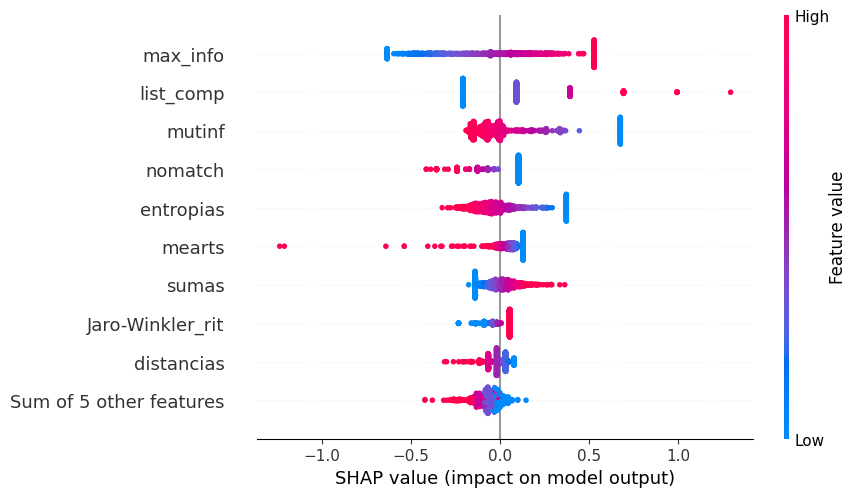

In [63]:
shap.plots.beeswarm(shap_values)

[0.16513748 0.33397649 0.44466868 0.44466868 0.57375992 0.03330722
 0.41899806 0.         0.18181818 0.3        0.375      0.30555556
 1.         0.        ] 0 0


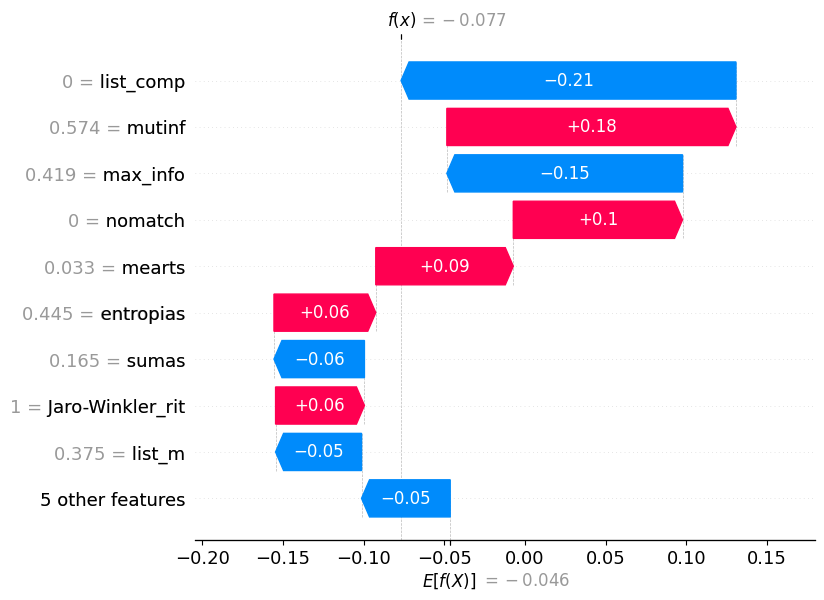

In [64]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

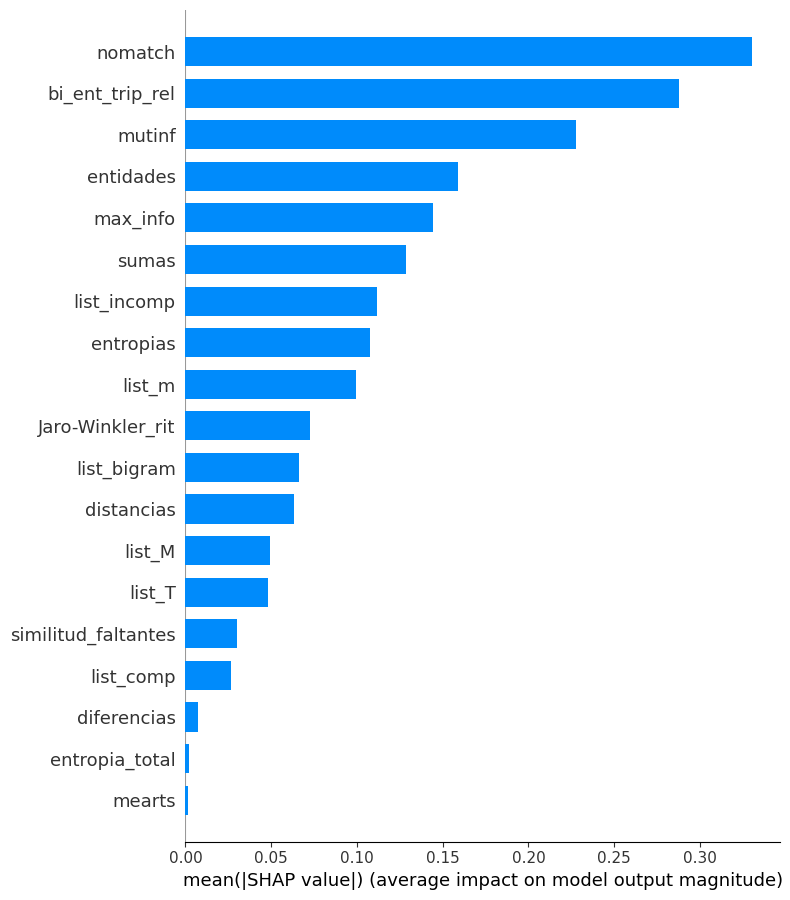

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

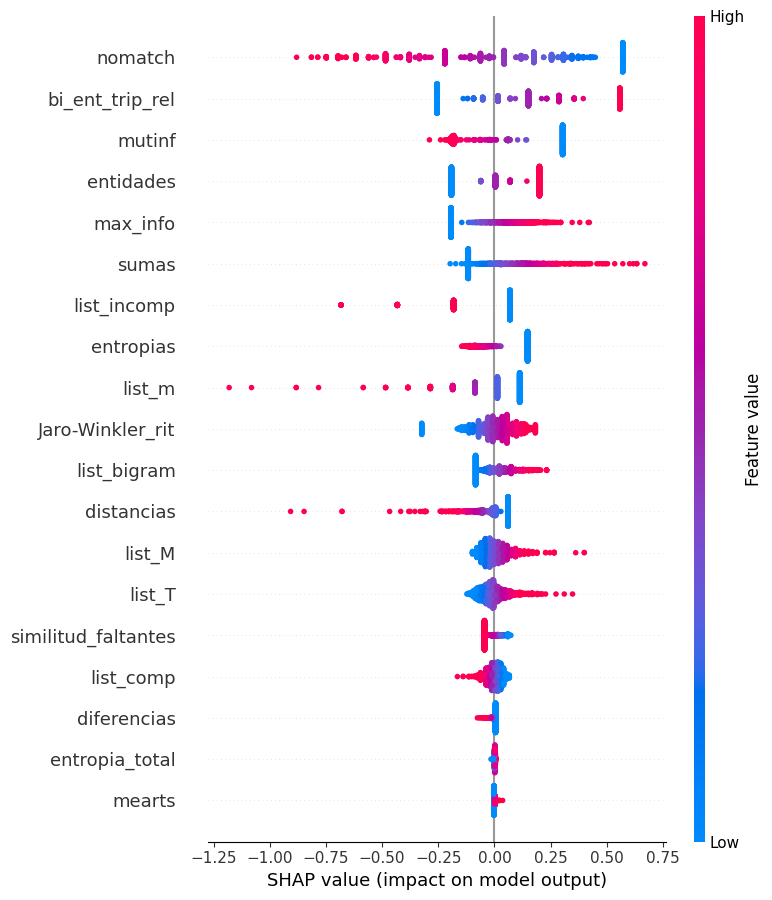

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

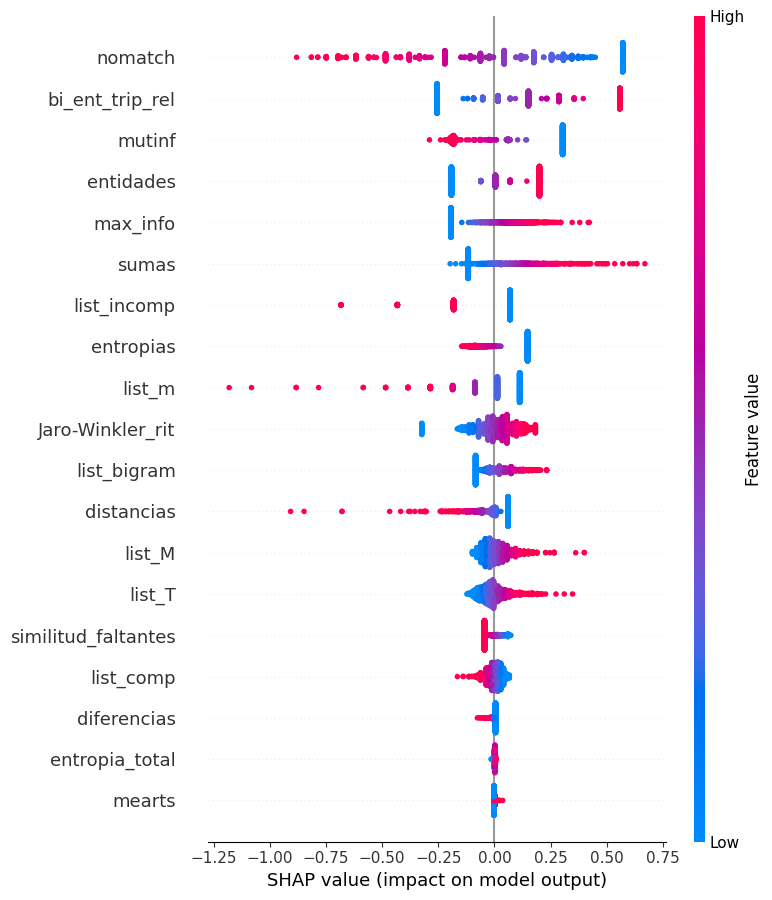

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

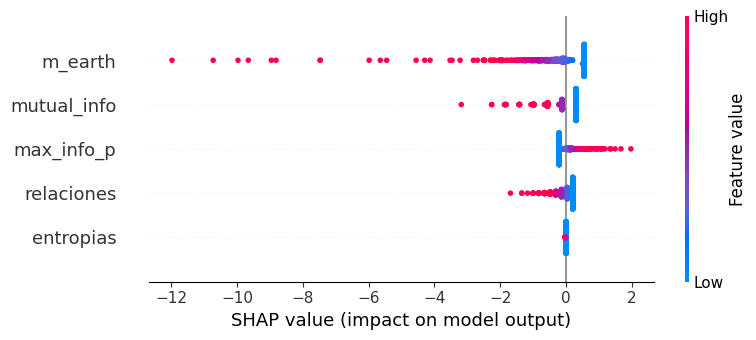

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


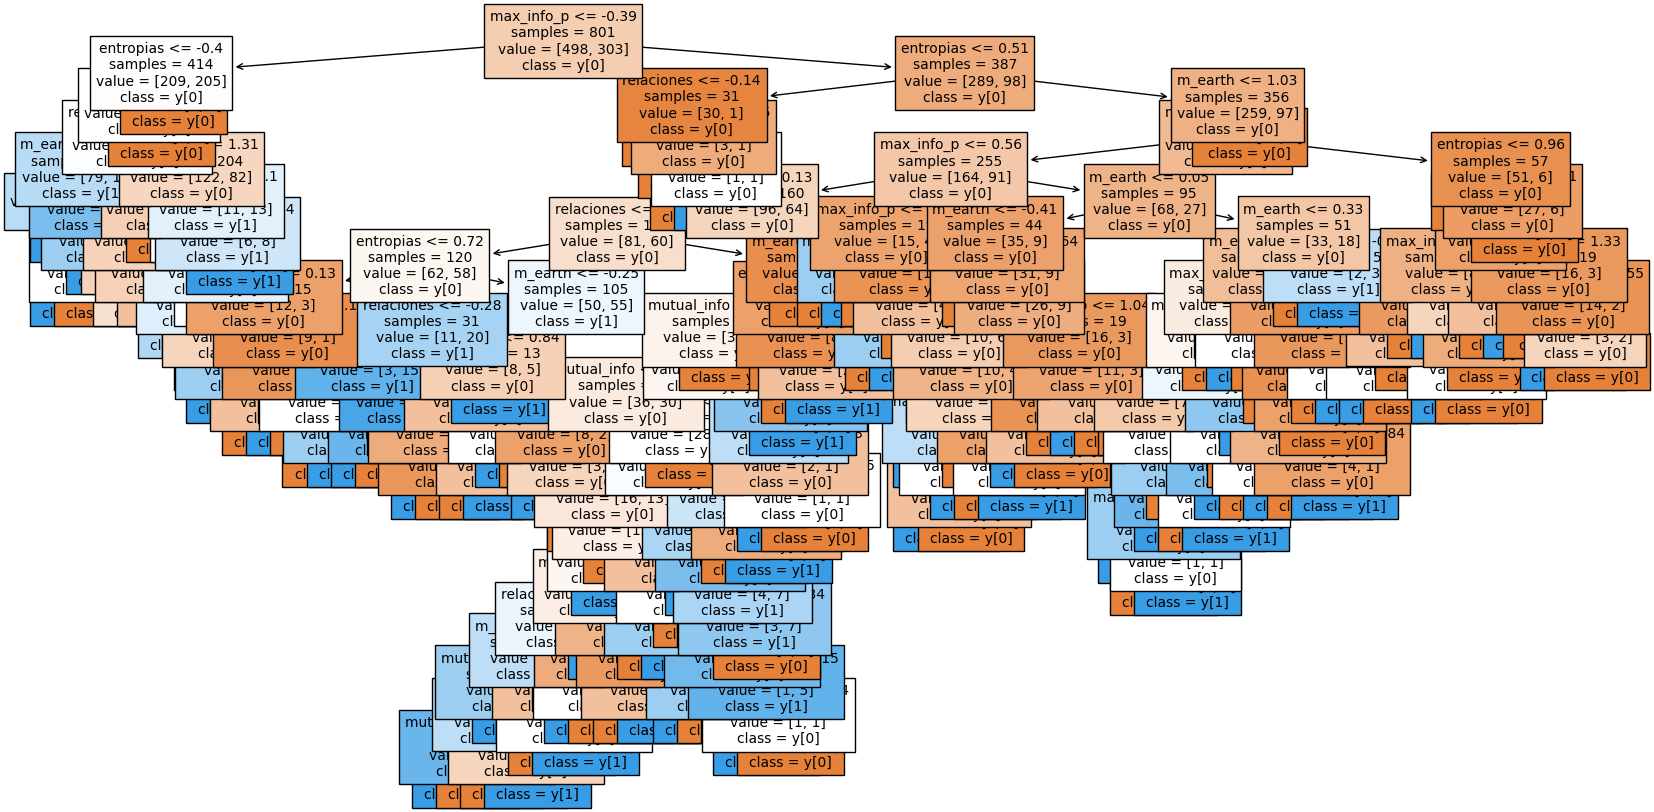

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )